# Принятие решений в бизнесе

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_colwidth', None)

## Описание проекта

Как аналитик крупного интернет-магазина мы подготовили список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты

### Описание данных

Данные для первой части
* Файл `/datasets/hypothesis.csv`. 
    * Hypothesis — краткое описание гипотезы;
    * Reach — охват пользователей по 10-балльной шкале;
    * Impact — влияние на пользователей по 10-балльной шкале;
    * Confidence — уверенность в гипотезе по 10-балльной шкале;
    * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части
* Файл `/datasets/orders.csv`. 
    * transactionId — идентификатор заказа;
    * visitorId — идентификатор пользователя, совершившего заказ;
    * date — дата, когда был совершён заказ;
    * revenue — выручка заказа;
    * group — группа A/B-теста, в которую попал заказ.
* Файл `/datasets/visitors.csv`.
    * date — дата;
    * group — группа A/B-теста;
    * visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Задачи проекта

* Приоритизация гипотез методами ICE и RICE для определения порядка внедрения новых улучшений
* Анализ A/B-тестирования: 
    * Анализ кумулятивных значений выручки, среднего чека и среднего количества заказов по группам
    * Анализ относительного изменения кумулятивного среднего чека группы B к группе A.
    * Анализ относительного изменения кумулятивного среднего количества заказов группы B к группе A.
    * Аналз аномалий А/В-теста
    * Проверка гипотез статистической значимости различий в среднем количестве заказов на посетителя и в среднем чеке между группами по сырым и очищенным данным

 ## Загрузка данных

In [42]:
try:
    hypothesis_df = pd.read_csv('hypothesis.csv')
except:
    hypothesis_df = pd.read_csv('https://****/hypothesis.csv')

In [43]:
try:
    orders_df = pd.read_csv('orders.csv')
except:
    orders_df = pd.read_csv('https://****/orders.csv')

In [44]:
try:
    visitors_df = pd.read_csv('visitors.csv')
except:
    visitors_df = pd.read_csv('https://****/visitors.csv')

Посмотрим инфо и первые строки каждого датафрейма

In [45]:
hypothesis_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [46]:
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [47]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [48]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [49]:
visitors_df.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [50]:
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Выводы:** Загружены 3 датасета
* `hypothesis_df` - гипотезы с их параметрами RICE
* `orders_df` - информация о заказах в ходе A/B-тестирования
* `visitors_df` - информация о посетителях в ходе A/B-тестирования

## Предобработка данных

Приведём названия полей к рекомендациям

In [51]:
hypothesis_df.rename(columns=str.lower, inplace=True)

In [52]:
orders_df.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

 Все поля,связанные с датой и временем, приведём к типу datetime

In [53]:
orders_df['date'] = pd.to_datetime(orders_df['date'])

In [54]:
visitors_df['date'] = pd.to_datetime(visitors_df['date'])

Проверим на наличие дубликатов

In [55]:
orders_df.duplicated().sum()

0

In [56]:
visitors_df.duplicated().sum()

0

### Результаты предобработки

Выведем инфо всех датафреймов

In [57]:
display(hypothesis_df.info())
display(visitors_df.info())
display(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

### Выводы
Во время предобработки данных:

* Изменили названия столбцов в соответствии с рекомендациями
* Привели поля с датой временем к типу datetime
* Проверили таблицы на отсутствие дубликатов

## Приоритизация гипотез

### Ранжирование методом ICE

In [58]:
hypothesis_df['ICE'] = round(hypothesis_df['impact'] * hypothesis_df['confidence'] / hypothesis_df['efforts'],2)
display(hypothesis_df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методу ICE лидируют гипотезы
* `Запустить акцию, дающую скидку на товар в день рождения`
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`

### Ранжирование методом RICE

In [59]:
hypothesis_df['RICE'] = round(hypothesis_df['reach'] * hypothesis_df['impact'] * hypothesis_df['confidence'] 
                              / hypothesis_df['efforts'],2)
display(hypothesis_df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Лидеры по методу RICE:
* `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Данные гипотезы  влияют на всех (или почти всех) пользователей, что выводит их вверх по показателю RICE

## Анализ A/B-теста

### Предварительный анализ А/В теста

#### Количество групп в АВ-тесте

Определим количество групп, учавствующих в А/В-тесте

In [60]:
display(visitors_df['group'].unique())
display(len(visitors_df['group'].unique()))

array(['A', 'B'], dtype=object)

2

В А/В-тесте участвуют 2 группы: А и В

#### Даты начала и окончания теста

Определим даты начала и окончания теста

In [61]:
print(f"Дата начала - {orders_df['date'].min().date()}")
print(f"Дата начала - {orders_df['date'].max().date()}")

Дата начала - 2019-08-01
Дата начала - 2019-08-31


A/B-тестирование длилось весь август 2019: с 01-08-2019 по 31-08-2019

#### Количество пользователей в каждой группе

In [62]:
a_size = len(orders_df[orders_df['group']=='A']['visitor_id'].unique())
b_size = len(orders_df[orders_df['group']=='B']['visitor_id'].unique())
print(f"Количество участников в группе А: {a_size}")
print(f"Количество участников в группе B: {b_size}")

Количество участников в группе А: 503
Количество участников в группе B: 586


In [63]:
round((b_size/a_size)*100 - 100,2)

16.5

**Группа В на 16.5% больше группы А. Это может быть проблемой и влиять на результаты теста**

#### Вероятность попадания пользователей в обе группы

In [64]:
group_a = orders_df[orders_df['group']=='A']['visitor_id'].unique()
group_b = orders_df[orders_df['group']=='B']['visitor_id'].unique()
all_visitors = len(orders_df['visitor_id'])
cross = []
for item in group_a:
    if item in group_b:
        cross.append(item)
print(f"Пересечений {len(cross)}")
print(f"Вероятность попадания пользователей в обе группы: {round((len(cross) / all_visitors) *100,2)}")

Пересечений 58
Вероятность попадания пользователей в обе группы: 4.85


**Примерно 5% пользователей попало в обе группы. Следовательно А/В-тестирование проведено с нарушениями**

### Подготовка кумулятивных данных

Соберём данные кумулятивной выручки по группам в датафреймы `cumulativeRevenueA` и `cumulativeRevenueB`

In [65]:
datesGroups = orders_df[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders_df[
        np.logical_and(
            orders_df['date'] <= x['date'], orders_df['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors_df[
        np.logical_and(
            visitors_df['date'] <= x['date'], visitors_df['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

### Кумулятивная выручка по группам

Построим график кумулятивной выручки по группам

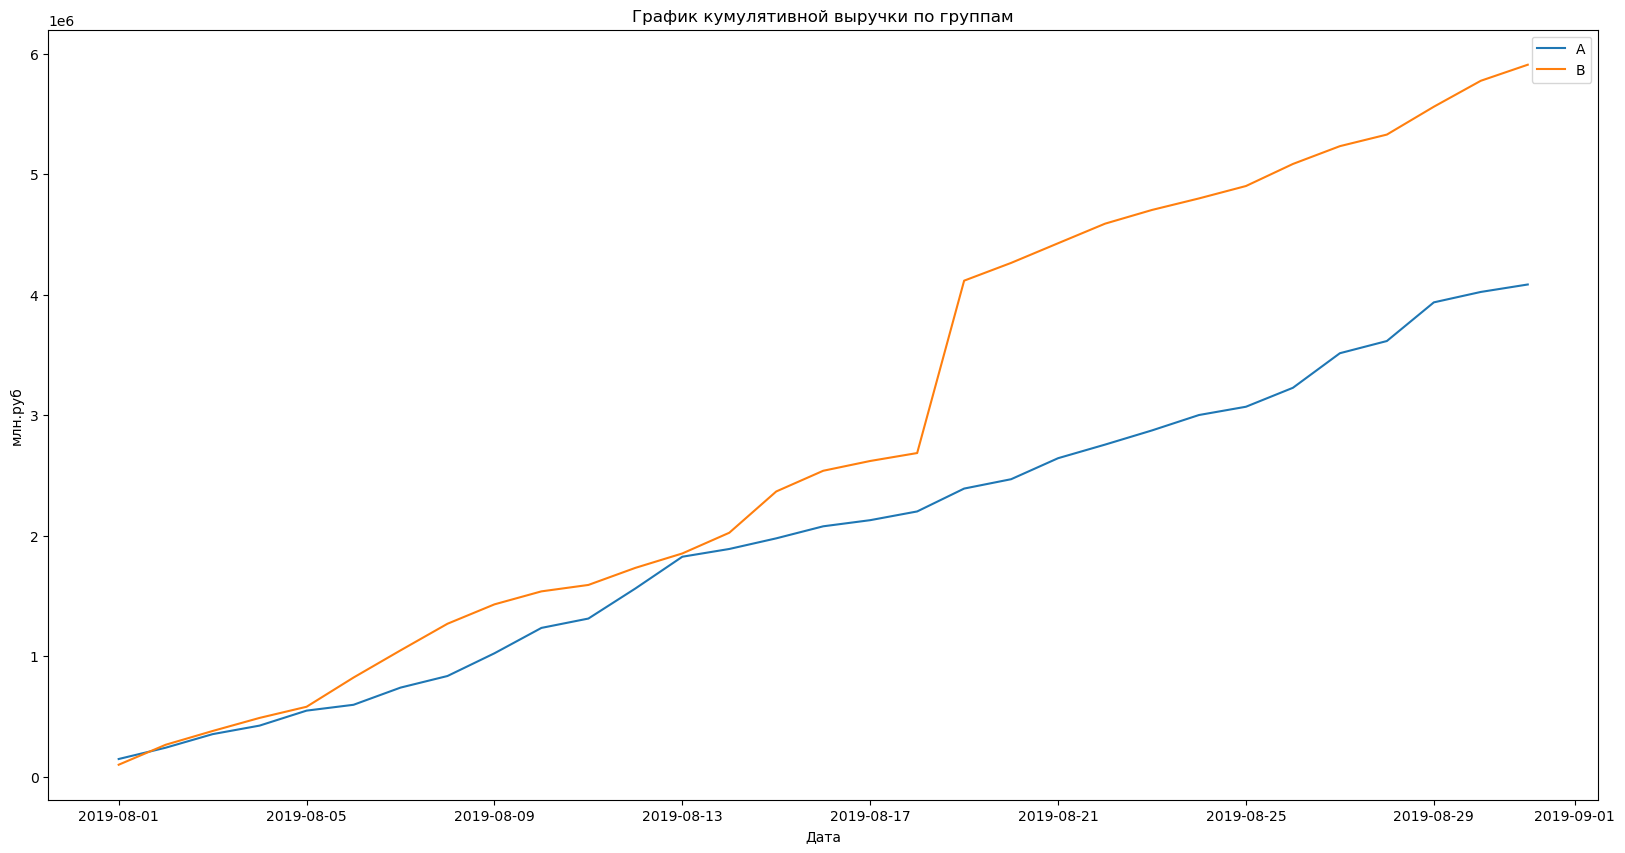

In [66]:
plt.figure(figsize=(20,10))
plt.xlabel('Дата')
plt.ylabel('млн.руб')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.legend();

**Вывод:** Группа B в целом показывает более высокую выручку, чем группа А, но основной отрыв произошёл за 1 день. Стоит рассмотреть, чем вызван такой резкий скачок

### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам

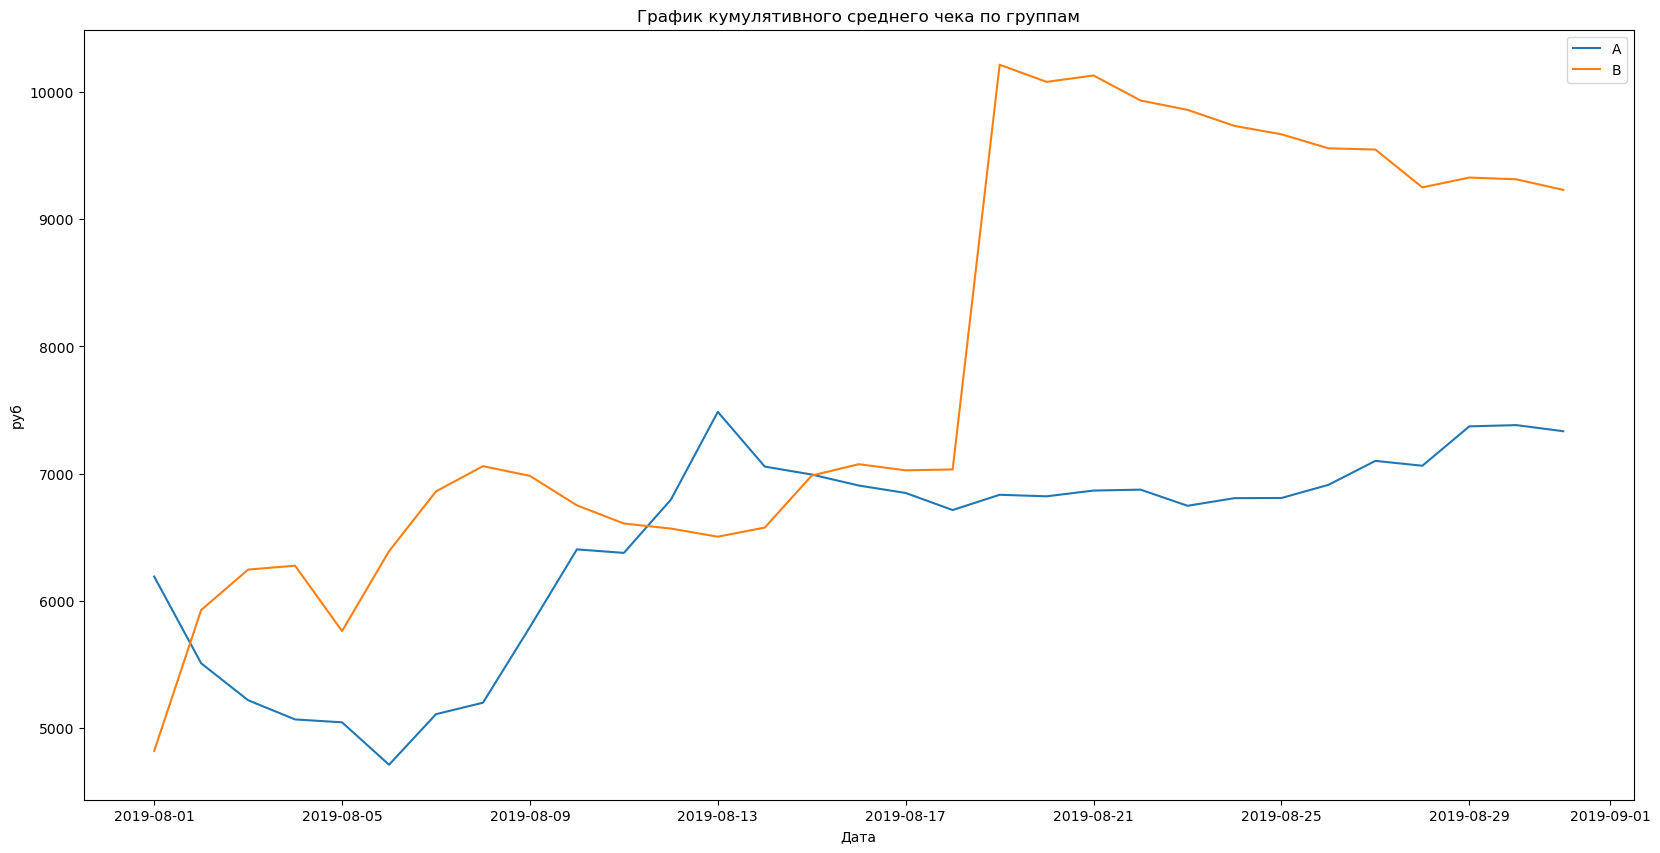

In [67]:
plt.figure(figsize=(20,10))
plt.xlabel('Дата')
plt.ylabel('руб')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

**Выводы:** Данные так же очень нестабильны. Аномальный выброс 19-08-2019

### Относительное изменение кумулятивного среднего чека

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

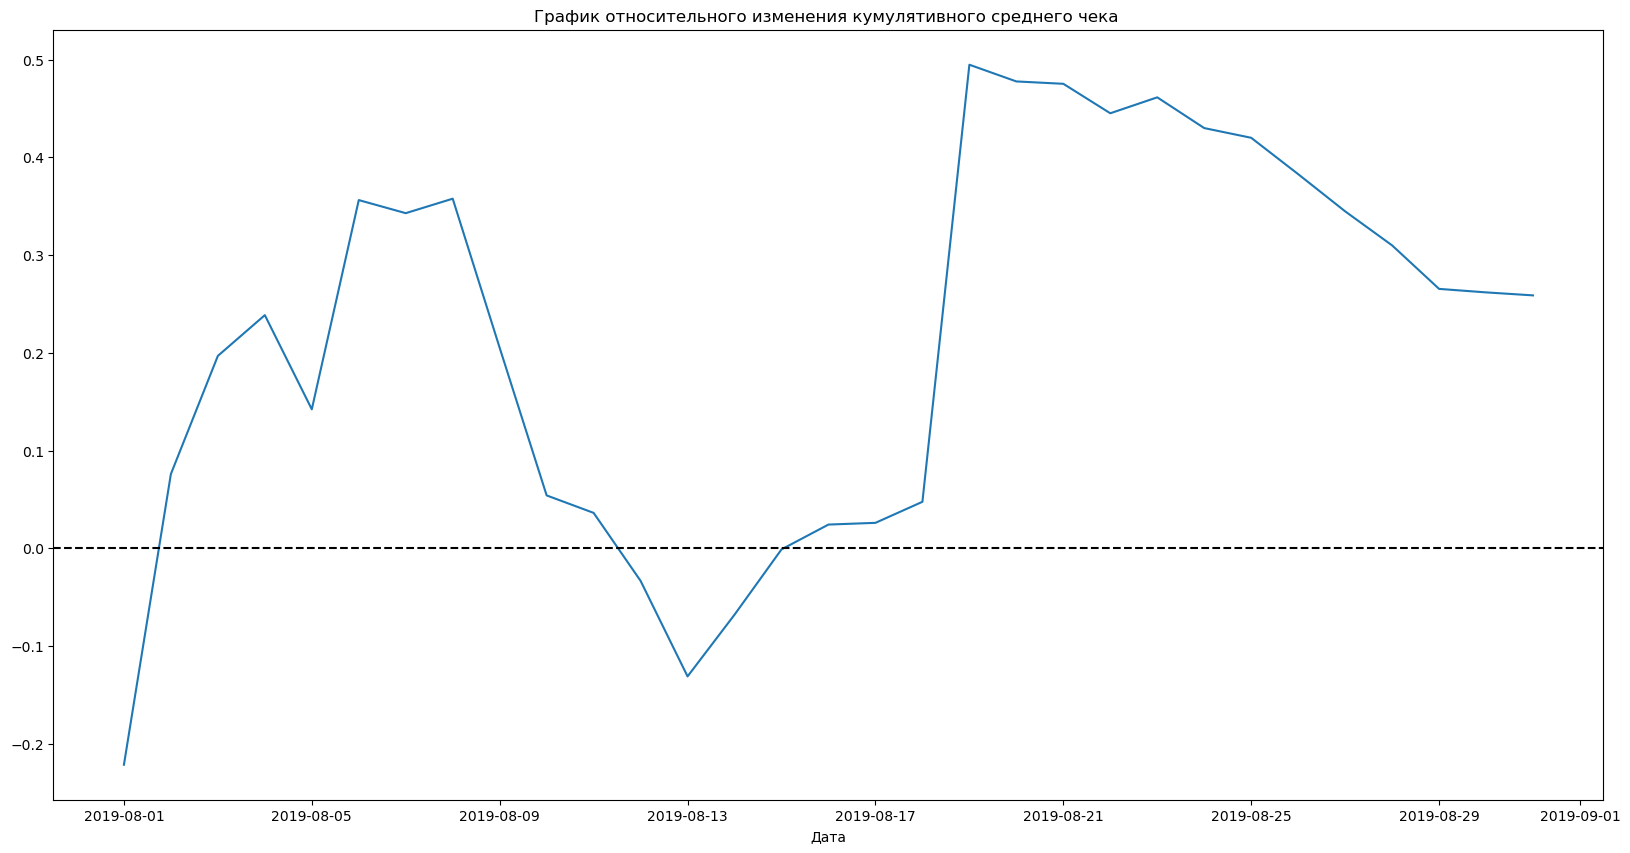

In [68]:
plt.figure(figsize=(20,10))
plt.xlabel('Дата')
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека ')
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** Аномалия 19-08 подбрасывает значение относительного изменения кумулятивного среднего чека к 50%. Потом это значение постепенно падает

### Кумулятивное среднее количество заказов на посетителя

Построим график кумулятивного среднего количества заказов на посетителя по группам

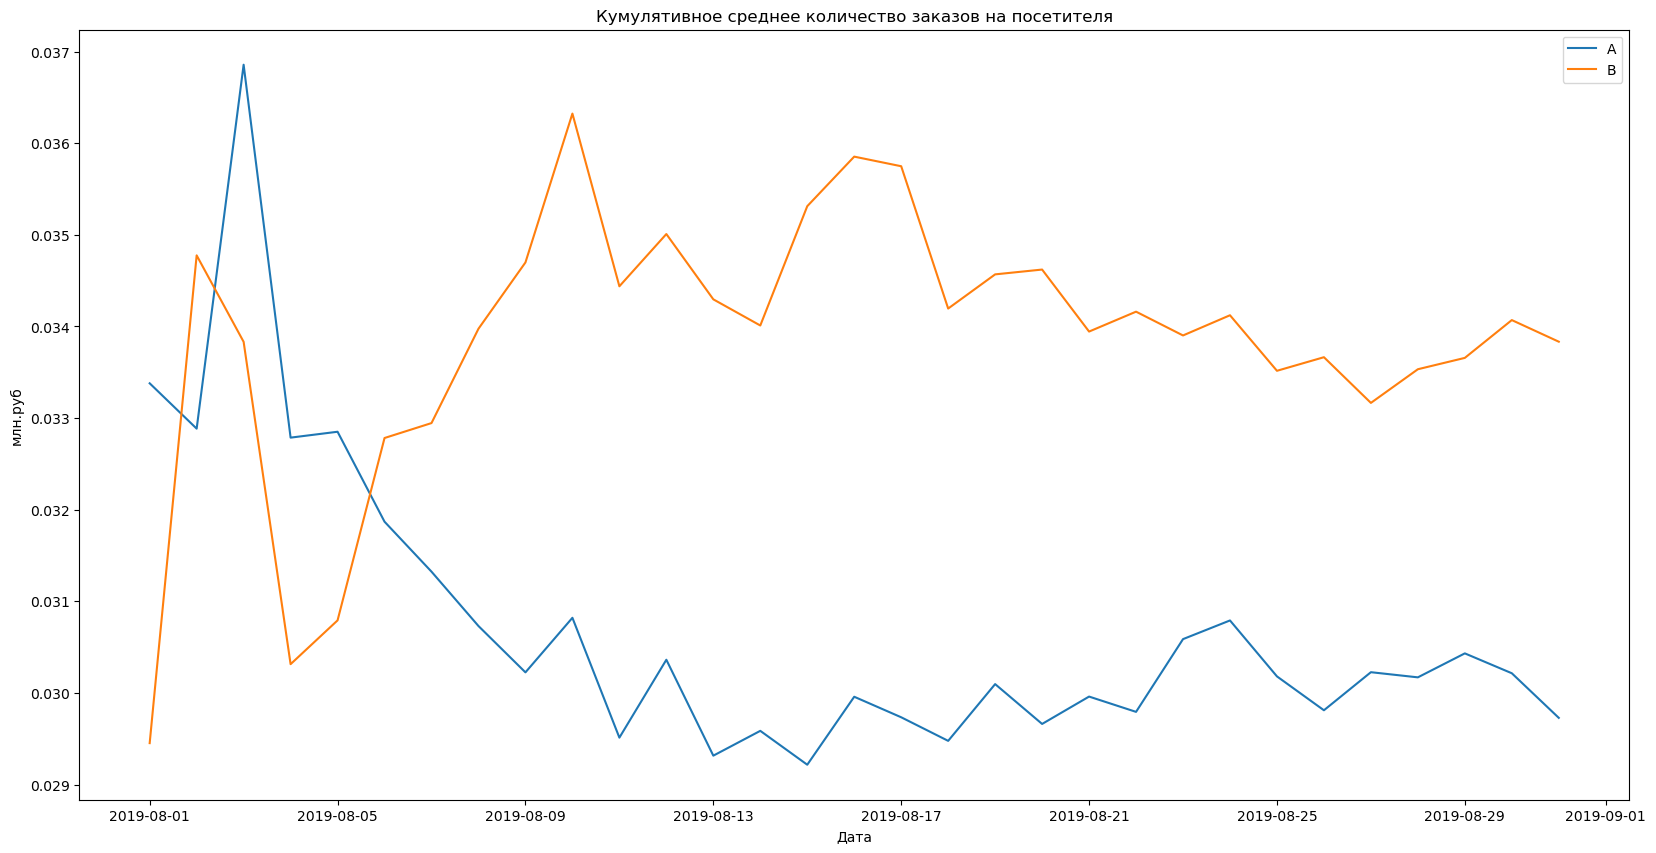

In [69]:
plt.figure(figsize=(20,10))
plt.xlabel('Дата')
plt.ylabel('млн.руб')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['conversion'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.legend();

**Вывод:** По началу данные нестабильны, но примерно через 10 дней наблюдений данные стабилизируются, и мы видим устойчивую картину, что посетители из группы В в  среднем делают больше заказов чем посетители группы А

### Относительное изменение кумулятивного среднего количества заказов на посетителя групп

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

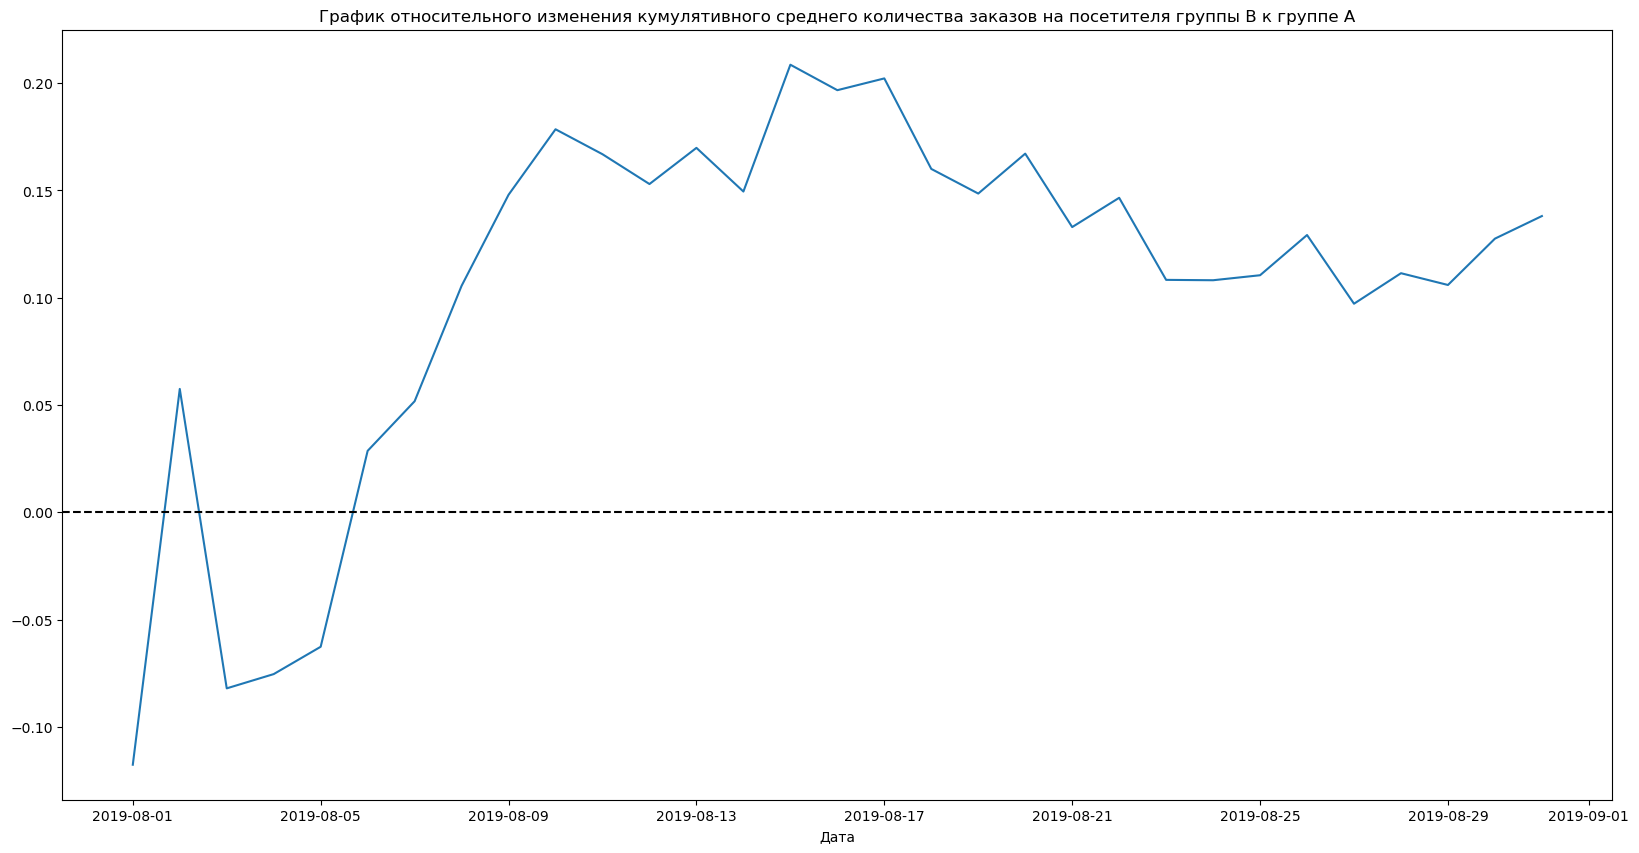

In [70]:
plt.figure(figsize=(20,10))
plt.xlabel('Дата')
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['conversionB']/mergedCumulativeRevenue['conversionA'])-1)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--');

**Выводы:** По началу данные нестабильны, но примерно через 10 дней наблюдений данные начинают стабилизируются. К концу наблюдений значением устанавливает в диапазоне 10-15%

### Точечный график количества заказов по пользователям.

Построим точечный график количества заказов по пользователям.

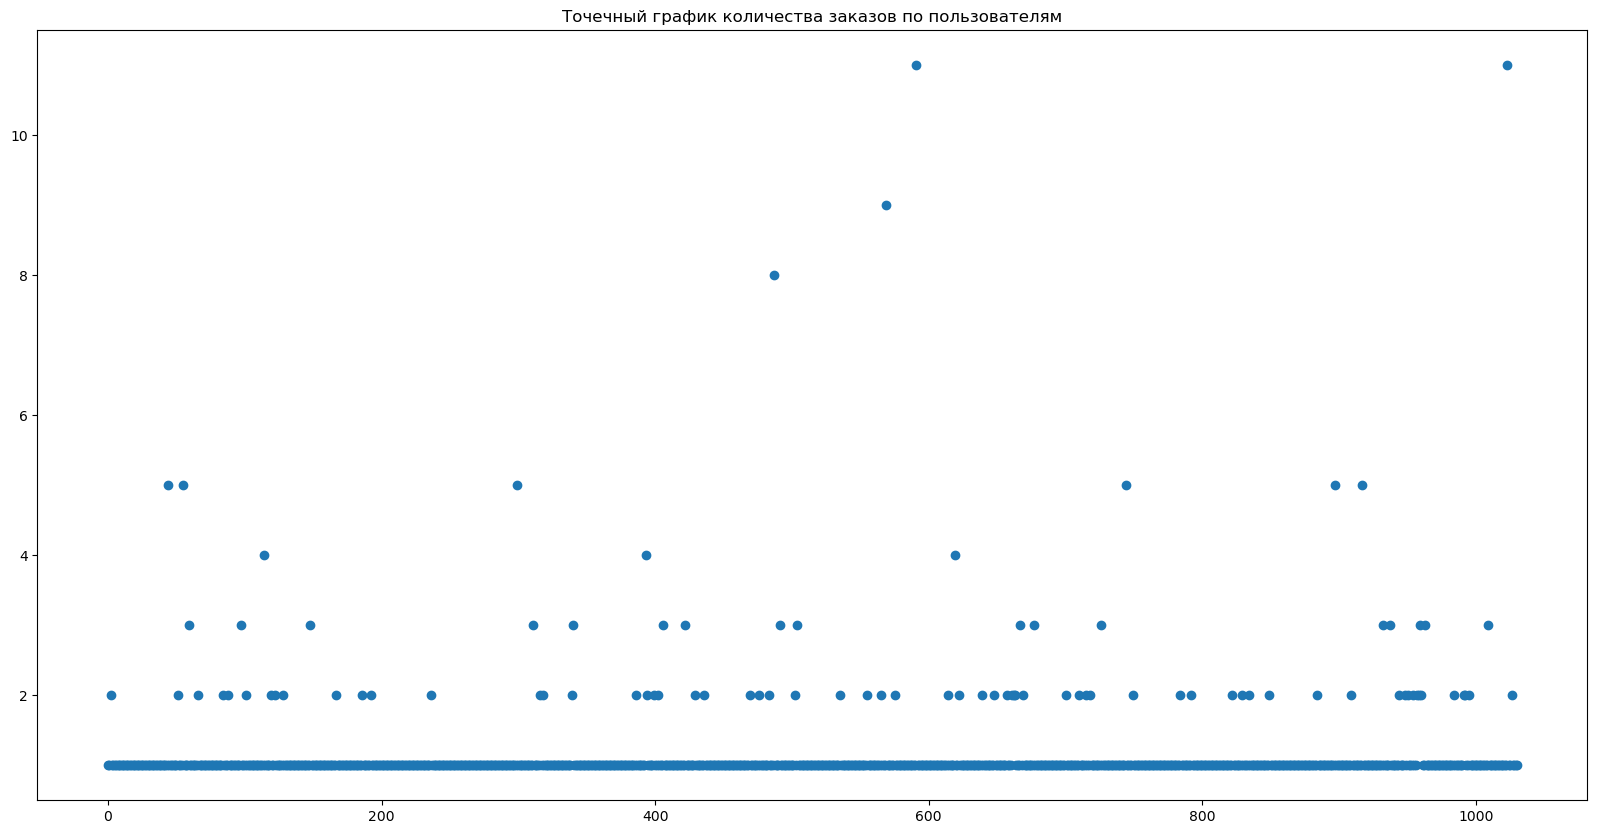

In [71]:
plt.figure(figsize=(20,10))
ordersByUsers = orders_df.pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique')
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers);

**Вывод** Видим, что большинство пользователей делает 1 заказ. Некоторое количество пользователей делает 2 заказа. 3 и более заказов делает незначительное количество пользователей.
Чтобы оценить, включать ли в анализ пользователей с 2 и более заказами, посчитаем 95-й и 99-й перцентиль количества заказов на пользователя.

### Перцентили количества заказов

In [72]:
np.percentile(ordersByUsers['transaction_id'], [95, 99])

array([2., 4.])

**Вывод** Не более 5% пользователей совершили 2 и более заказов. Отсеим пользователей, совершившиех более 2 заказов.

### Точечный график стоимости заказов

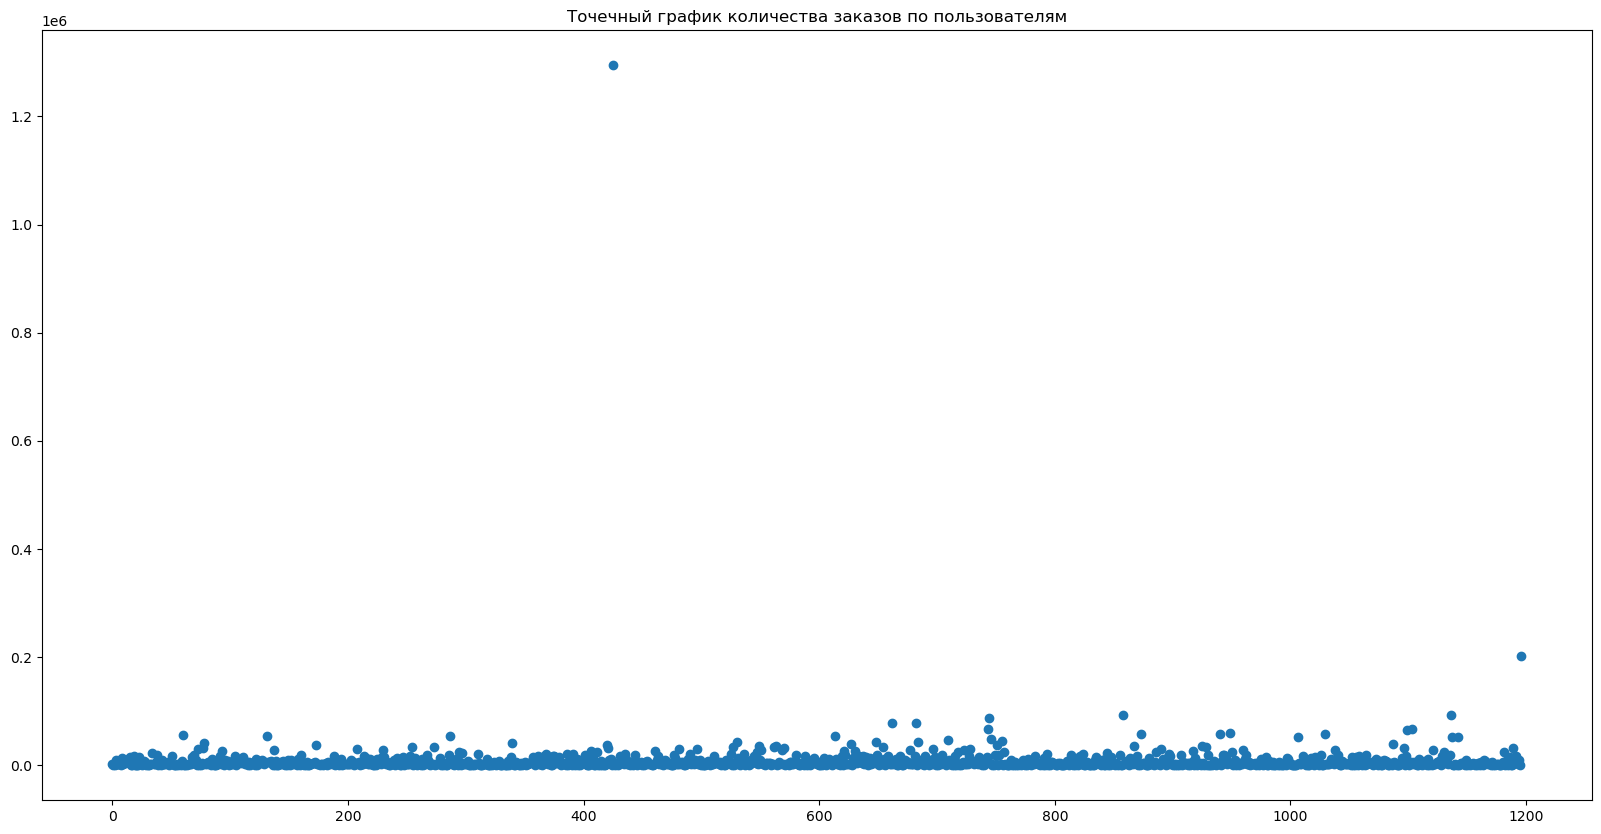

In [73]:
plt.figure(figsize=(20,10))
x_values = pd.Series(range(0,len(orders_df)))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, orders_df['revenue']);

In [74]:
orders_df['revenue'].max()

1294500

Есть один аномальный заказ на 1.294.500, который мешает рассмотреть график. Зададим пределы по оси y

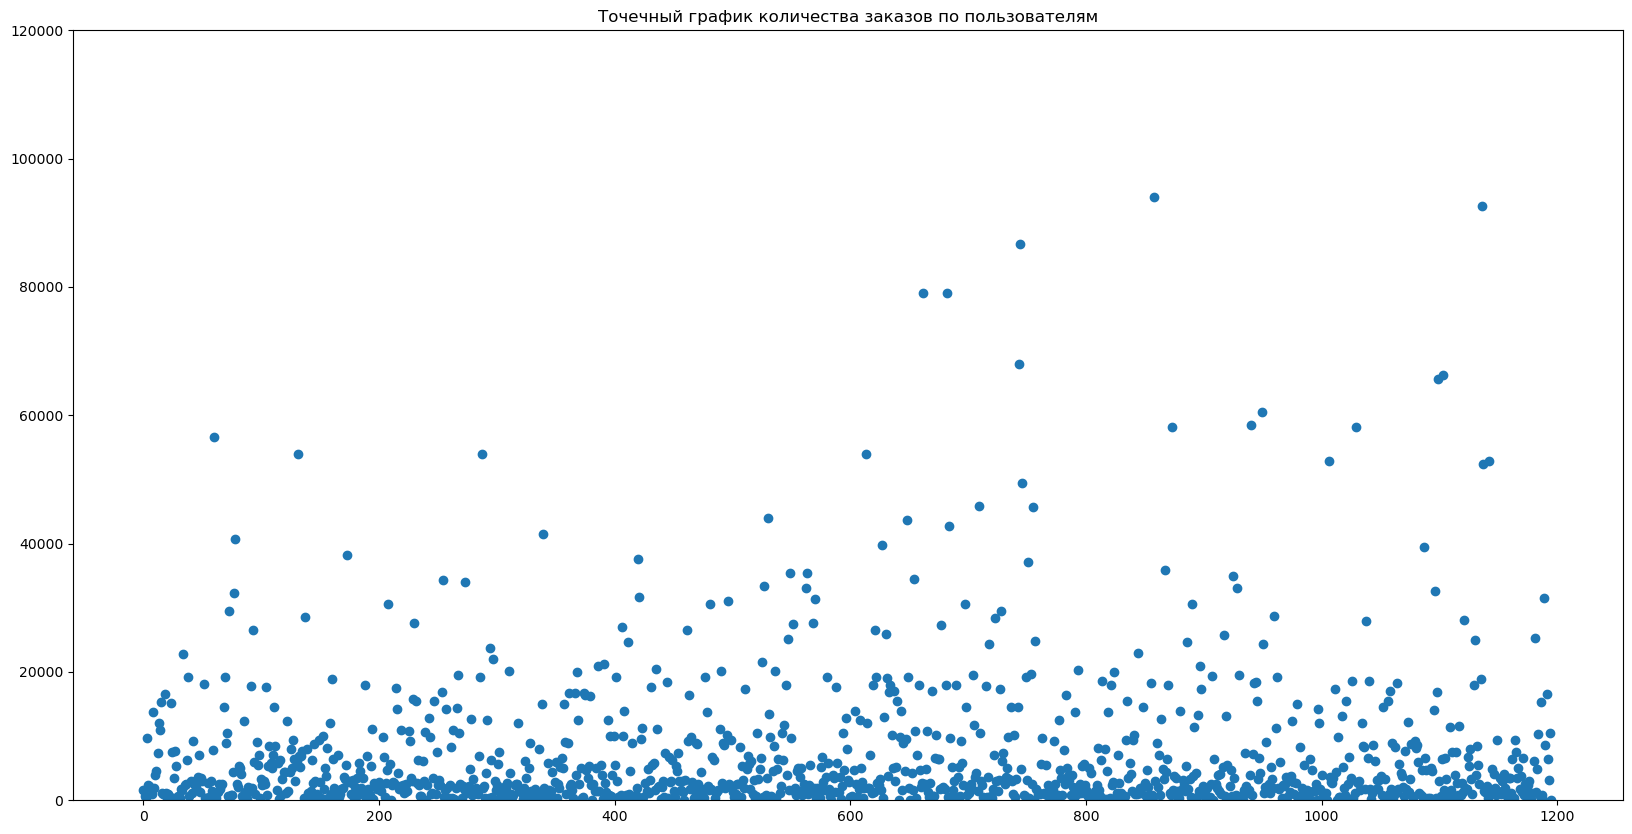

In [75]:
plt.figure(figsize=(20,10))
x_values = pd.Series(range(0,len(orders_df)))
plt.title('Точечный график количества заказов по пользователям')
plt.ylim(0,120000)
plt.scatter(x_values, orders_df['revenue']);

**Вывод** Большинство заказов не более чем на 20тыс. Посчитаем 95 и 99 перцентили

### Перцентили стоимости заказов

In [76]:
np.percentile(orders_df['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** 95% пользователй делают заказ не более чем на 28тыс, и только 1% делает заказ более чем на 58233руб. Оставим в выборке только заказы стоимостью не более 28000

### Cтатистическая значимость различий в среднем количестве заказов на посетителя по сырым данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

* H0: различий между группами A и B нет. 
* H1: есть статистически значимые различия

In [77]:
orders_a = orders_df[orders_df['group'] == 'A']
orders_b = orders_df[orders_df['group'] == 'B']
orders_by_users_a = orders_a.pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique')
orders_by_users_b = orders_b.pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique')

In [78]:
alpha = 0.05
results = st.mannwhitneyu(orders_by_users_a['transaction_id'],orders_by_users_b['transaction_id'])
print('p-значение: ', round(results.pvalue,2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.89
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [79]:
avg_orders_a = round(orders_by_users_a.mean()[0],2)
avg_orders_b = round(orders_by_users_b.mean()[0],2)
print(f"Среднее количество заказов в группе А: {avg_orders_a}")
print(f"Среднее количество заказов в группе В: {avg_orders_b}")
print(f"Отношение между групп: {round((avg_orders_a / avg_orders_b - 1)*100,2)}%")

Среднее количество заказов в группе А: 1.11
Среднее количество заказов в группе В: 1.09
Отношение между групп: 1.83%


**Вывод** Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. Разница между средниеми значениями групп несущественна

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

* H0: различий между группами A и B нет. 
* H1: есть статистически значимые различия

In [80]:
bills_a = orders_df[orders_df['group']=='A']['revenue']
bills_b = orders_df[orders_df['group']=='B']['revenue']
avg_bill_a = bills_a.mean()
avg_bill_b = bills_b.mean()

In [81]:
alpha = 0.05
results = st.mannwhitneyu(bills_a,bills_b)
print('p-значение: ', round(results.pvalue,2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.73
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [82]:
print(f"Средний чек в группе А: {avg_bill_a}")
print(f"Средний чек в группе B: {avg_bill_b}")
print(f"Отношение между групп: {round((bills_b.mean()/bills_a.mean()-1)*100,2)}%")


Средний чек в группе А: 7333.578096947936
Средний чек в группе B: 9230.875
Отношение между групп: 25.87%


**Вывод** Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. При этом средний чек в группе В выше на 26%. Видимо это связано с отдельными аномалиями резко повышающими среднее значчение

### Статистическая значимость различий в среднем количестве заказов на посетителя по «очищенным» данным

Предварительно очистим данным. Ранее мы приняли, что убираем пользователей, сделавших более 2 заказов, и чеки свыше 28.000

In [83]:
clear_orders_by_users_a = orders_by_users_a[orders_by_users_a['transaction_id'] <= 2]
clear_orders_by_users_b = orders_by_users_b[orders_by_users_b['transaction_id'] <= 2]
clear_orders_a = orders_a[orders_a['revenue'] < 28000]
clear_orders_b = orders_b[orders_b['revenue'] < 28000]

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
* H0: различий между группами A и B нет.
* H1: есть статистически значимые различия

In [84]:
alpha = 0.05
results = st.mannwhitneyu(clear_orders_by_users_a['transaction_id'],clear_orders_by_users_b['transaction_id'])
print('p-значение: ', round(results.pvalue,2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.65
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [85]:
clear_avg_orders_a = round(clear_orders_by_users_a['transaction_id'].mean(),2)
clear_avg_orders_b = round(clear_orders_by_users_b['transaction_id'].mean(),2)
print(f"Среднее количество заказов в группе А: {clear_avg_orders_a}")
print(f"Среднее количество заказов в группе В: {clear_avg_orders_b}")
print(f"Отношение между групп: {round((clear_avg_orders_a / clear_avg_orders_b - 1)*100,2)}%")

Среднее количество заказов в группе А: 1.03
Среднее количество заказов в группе В: 1.04
Отношение между групп: -0.96%


**Вывод** Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. Разница между средниеми значениями групп несущественна

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

* H0: различий между группами A и B нет.
* H1: есть статистически значимые различия

In [86]:
alpha = 0.05
results = st.mannwhitneyu(clear_orders_a['revenue'],clear_orders_b['revenue'])
print('p-значение: ', round(results.pvalue,2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.85
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [87]:
round(clear_orders_b['revenue'].mean()/clear_orders_a['revenue'].mean(),2)

0.98

In [88]:
clear_avg_bill_a = clear_orders_a['revenue'].mean()
clear_avg_bill_b = clear_orders_b['revenue'].mean()
print(f"Средний чек в группе А: {clear_avg_bill_a}")
print(f"Средний чек в группе B: {clear_avg_bill_b}")
print(f"Отношение между групп: {round((clear_avg_bill_b/clear_avg_bill_a-1)*100,2)}%")

Средний чек в группе А: 5213.212806026366
Средний чек в группе B: 5128.66501650165
Отношение между групп: -1.62%


**Вывод** Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя. Отношение средних значений между групп несущественно

## Вывод по результатам A/B теста

* Проведение A/B-тест показало, что разницы между группами не видно. Вводить нововведение нецелесообразно
* Стоит отметить, что тестирование проведено с ошибками:
    * Группа В на 16.5% больше группы А
    * 5% пользователей попало в обе группы